In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import os

In [90]:
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')

data

,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [91]:
# Define the features
features = ['542236', '67321', '549295', '41108', '541982']

In [92]:
#Hyperparameters

rr_hparams = {
    'alpha': 1, 
    'solver': 'auto',
    'tol': 0.001,
    'max_iter': 50,
}

mlp_hparams = {
    'hidden_layer_sizes': (50, 50, 50, 50),
    'activation': 'relu',
    #'solver': 'adam',
    'max_iter': 50,
    #'verbose': 10,
    'learning_rate_init': .1,
}

gb_hparams = {
    'n_estimators': 100,
    'learning_rate': 0.1,
}

xgb_hparams = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'random_state':42
}

In [93]:
# Models/Algorithms used
models = {
    'Ridge Regression': Ridge(**rr_hparams),
    'MLP': MLPRegressor(**mlp_hparams),
    'Gradient Boosting': GradientBoostingRegressor(**gb_hparams),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(**xgb_hparams)
}

In [94]:
def plot_actual_vs_predicted(y_test, best_model, md):
    plt.plot(y_test, label='Actual')
    plt.plot(best_model.predict(md), label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 542236
Ridge Regression: Accuracy = 100.00%
MLP: Accuracy = 99.70%
Gradient Boosting: Accuracy = 99.56%
Random Forest: Accuracy = 99.68%
XGBoost: Accuracy = 99.24%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


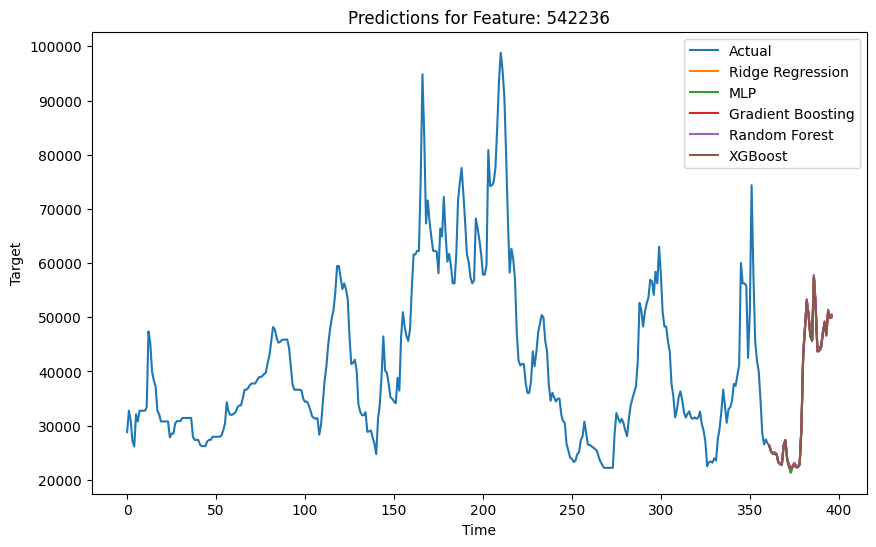

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 67321
Ridge Regression: Accuracy = 100.00%
MLP: Accuracy = 99.63%
Gradient Boosting: Accuracy = 99.55%
Random Forest: Accuracy = 99.42%
XGBoost: Accuracy = 99.50%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


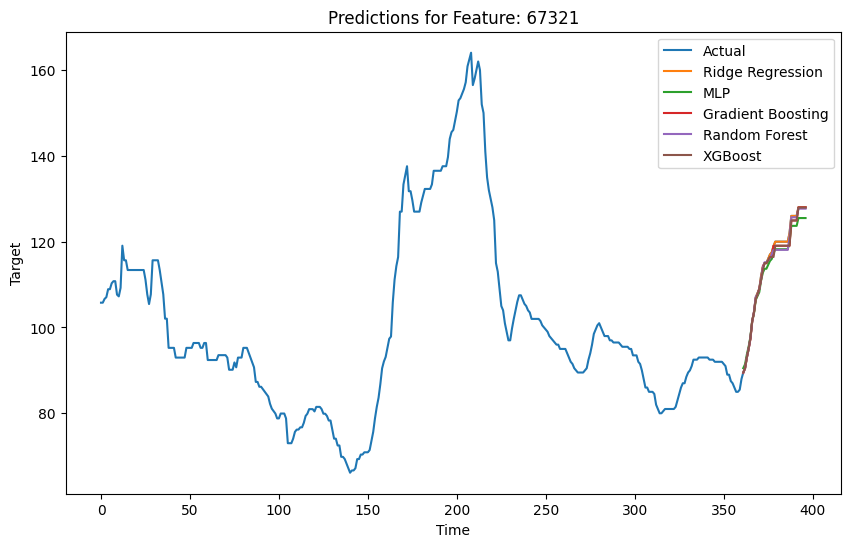

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 549295
Ridge Regression: Accuracy = 99.97%
MLP: Accuracy = 99.02%
Gradient Boosting: Accuracy = 99.58%
Random Forest: Accuracy = 99.67%
XGBoost: Accuracy = 99.45%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


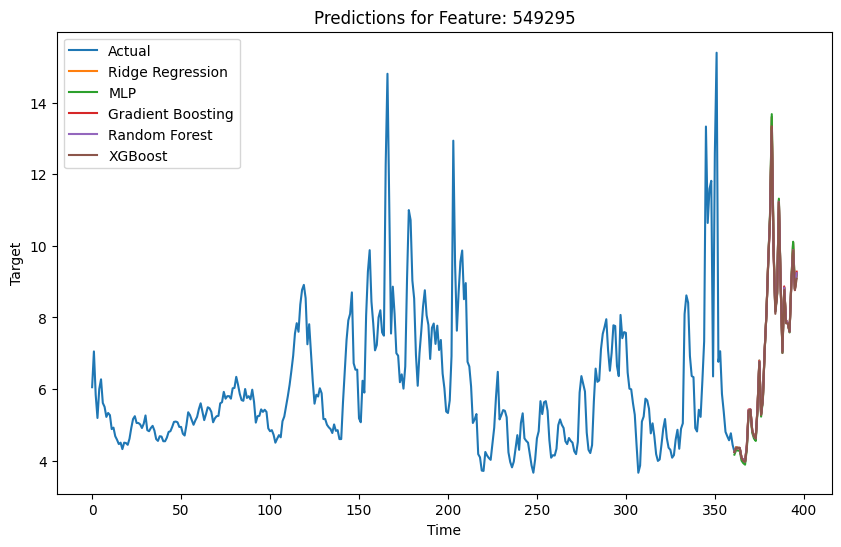

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 41108
Ridge Regression: Accuracy = 100.00%
MLP: Accuracy = 95.54%
Gradient Boosting: Accuracy = 99.58%
Random Forest: Accuracy = 99.67%
XGBoost: Accuracy = 98.89%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


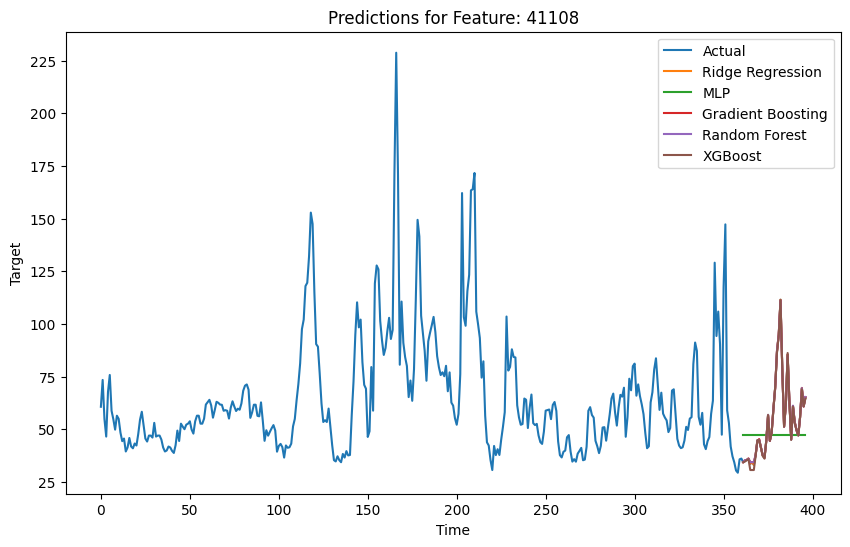

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Feature: 541982
Ridge Regression: Accuracy = 100.00%
MLP: Accuracy = 98.91%
Gradient Boosting: Accuracy = 99.40%
Random Forest: Accuracy = 99.61%
XGBoost: Accuracy = 99.27%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


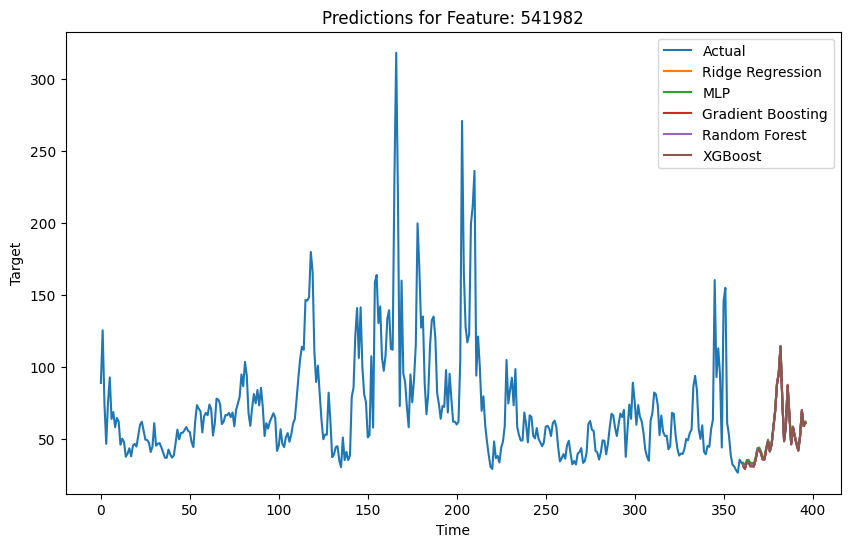

The best model is: Ridge Regression with an accuracy of 100.00%


In [95]:
# Loop through each feature
for feature in features:
    X = data[feature].values.reshape(-1, 1)
    y = data[feature].values

    # Split the dataset into training and testing sets
    X_train = X[:-36]  # Select all rows except the last 36
    y_train = y[:-36]
    X_test = X[-36:]   # Select the last 36 rows
    y_test = y[-36:]
    
    # Pre-processing Technique: Dimensionality Recution - Principal Component Analysis(PCA)
    # Standardize the features
    # Normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)  

    accuracies = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = 100 * (1 - np.abs((y_test - y_pred) / y_test)).mean()
        #accuracies[name] = (model, accuracy)  # Storing the model object along with its name
        accuracies[name] = accuracy


    # Print accuracies for each model
    print(f"Feature: {feature}")
    for name, accuracy in accuracies.items():
        print(f"{name}: Accuracy = {accuracy:.2f}%")

    # Visualize the results
    plt.figure(figsize=(10, 6))
    
    plt.plot(data.index, data[feature], label='Actual') # Check if it is really 'feature' to put in data[]
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.plot(data.index[-36:], y_pred, label=name)
    plt.xlabel('Time')
    plt.ylabel('Target')
    plt.title(f'Predictions for Feature: {feature}')
    plt.legend()
    plt.show()
    
# Identify the best model based on accuracy
best_model = max(accuracies, key=accuracies.get)
print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]:.2f}%")


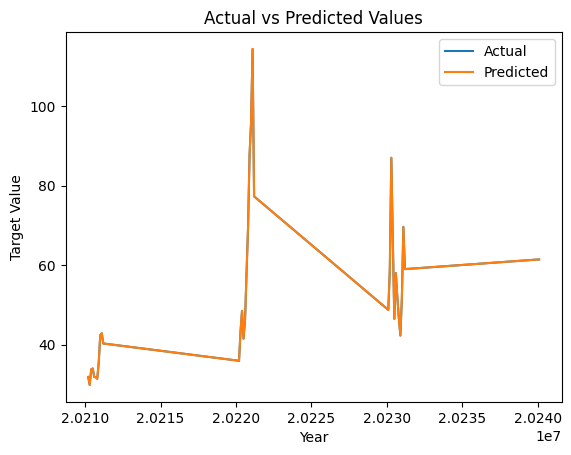

In [96]:
import pandas as pd
from docx import Document

def plot_actual_vs_predicted(y_test, best_model, X_test, filename, last_36_months):
    # Plot actual vs predicted values
    plt.plot(last_36_months, y_test, label='Actual')
    plt.plot(last_36_months, best_model.predict(X_test), label='Predicted')
    plt.xlabel('Year')
    plt.ylabel('Target Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    
    # Save the plot to an Excel file
    df = pd.DataFrame({
        'Year': last_36_months,
        'Target Values': y_test, 
        'Predicted Values': best_model.predict(X_test),
        'Accuracy': accuracies[name]
        })
    df.to_excel(filename + ".xlsx", index=False)

    # Save the plot to a Word document
    doc = Document()
    doc.add_heading('Actual vs Predicted Values', level=1)
    doc.add_paragraph("Actual vs Predicted Values:")
    doc.add_table(df.shape[0]+1, df.shape[1], style="Table Grid")
    table = doc.tables[0]
    for i, column in enumerate(df.columns):
        table.cell(0, i).text = column
        for j, value in enumerate(df[column]):
            table.cell(j+1, i).text = str(value)
    doc.save(filename + ".docx")

# Example usage
last_36_months = data.iloc[-36:, 0]
plot_actual_vs_predicted(y_test, models[best_model], X_test, "result", last_36_months)

